### Analysis of pseudotime with cr

In [1]:
# from pathlib import Path
import pandas as pd
import cellrank as cr
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

In [2]:
adata = sc.read_h5ad('dt_out/1_invivo_analysis/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_PAGA.h5ad')

/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata.var_names = adata.var['gene_name'].astype(str)
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 517 × 19459
    obs: 'condition', 'sample', 'Sample_id', 'Plate', 'Animal', 'Batch', 'Condition', 'Well', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_ERCC', 'pct_counts_ERCC', 'n_genes', 'outlier_mt', 'outlier_total', 'outlier_ngenes', 'outlier_ERCC', 'Batch_Animal', 'leiden', 'leiden_0.5', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'celltype', 'dpt_pseudotime', 'SC_genes'
    var: 'gene_symbol', 'gene_name', 'type', 'gene_symbol_with_control', 'mt', 'ribo', 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_modified', 'highly_variable_or

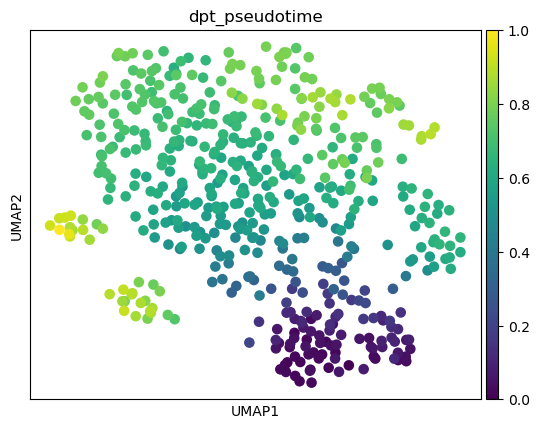

In [5]:
sc.pl.umap(adata, color = "dpt_pseudotime")

In [6]:
from cellrank.kernels import PseudotimeKernel

pk = PseudotimeKernel(adata, time_key="dpt_pseudotime")

In [7]:
pk.compute_transition_matrix()


100%|████████████████████████████████████████████████████████████████████████████| 517/517 [00:00<00:00, 2226.52cell/s]


PseudotimeKernel[n=517, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [9]:
from cellrank.kernels import ConnectivityKernel

ck = ConnectivityKernel(adata).compute_transition_matrix()

In [10]:
combined_kernel = 0.8 * pk + 0.2 * ck
combined_kernel

(0.8 * PseudotimeKernel[n=517, dnorm=False, scheme='hard', frac_to_keep=0.3] + 0.2 * ConnectivityKernel[n=517, dnorm=True, key='connectivities'])

In [12]:
from cellrank.estimators import GPCCA

g = GPCCA(combined_kernel)

/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


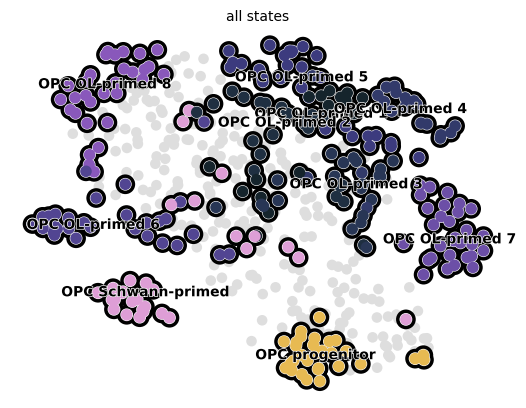

In [13]:
g.fit(n_states=10, cluster_key="celltype")
g.plot_macrostates(which="all")

/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


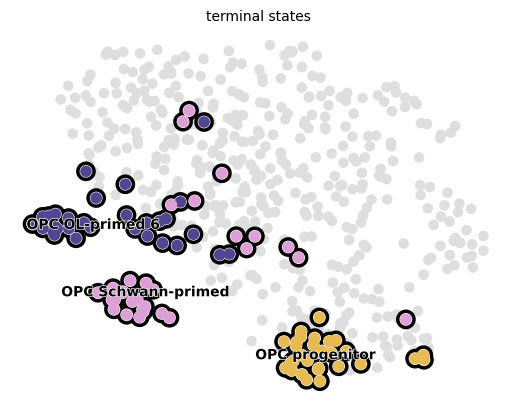

In [22]:
g.predict_terminal_states(method="top_n", n_states=3)
g.plot_macrostates(which="terminal")

100%|██████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 21.35/s]
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


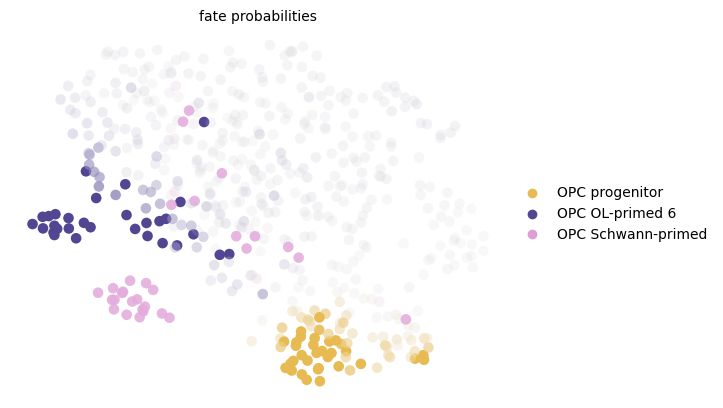

In [23]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(legend_loc="right")

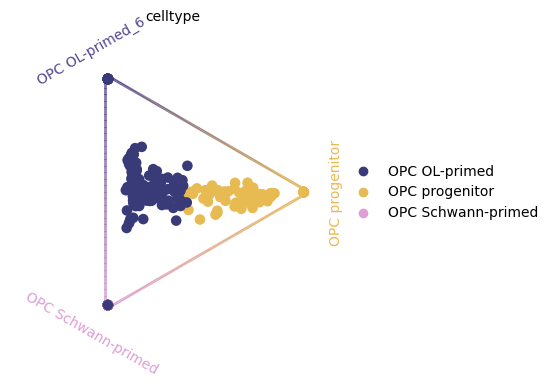

In [25]:
cr.pl.circular_projection(adata, keys="celltype", legend_loc="right")

In [26]:
sc_drivers = g.compute_lineage_drivers(lineages="OPC Schwann-primed")
sc_drivers.head(10)

,OPC Schwann-primed_corr,OPC Schwann-primed_pval,OPC Schwann-primed_qval,OPC Schwann-primed_ci_low,OPC Schwann-primed_ci_high
gene_name,,,,,
Col18a1,0.559904,1.159285e-46,2.255852e-42,0.497699,0.616378
Gas7,0.519628,5.954500e-39,5.247424e-35,0.453723,0.579879
Plekha4,0.503818,3.113506e-36,1.514643e-32,0.436549,0.565485
Itga1,0.476679,6.330618e-32,2.463750e-28,0.407181,0.540688
Egfl8,0.474601,1.299310e-31,4.213879e-28,0.404939,0.538786
Egflam,0.461513,1.064370e-29,2.588946e-26,0.390832,0.526783
ENSRNOG00000052925,0.457960,3.393697e-29,7.337551e-26,0.387009,0.523521
Dhh,0.442117,4.992080e-27,8.830989e-24,0.369988,0.508949
Dkk3,0.433721,6.265424e-26,1.015991e-22,0.360987,0.501210


In [70]:
sc_drivers.to_csv("dt_out/1_invivo_analysis/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_PAGA_cellrank_SC_cellfate_drivers.csv")

Note: took top 480 for TF + enrichment analyses (FDR<1e4, coeff > 0.18), or just top 200 genes (as >400 was too many).

In [38]:
adata.obs["fate_probabilities_sc"] = g.fate_probabilities["OPC Schwann-primed"].X.flatten()


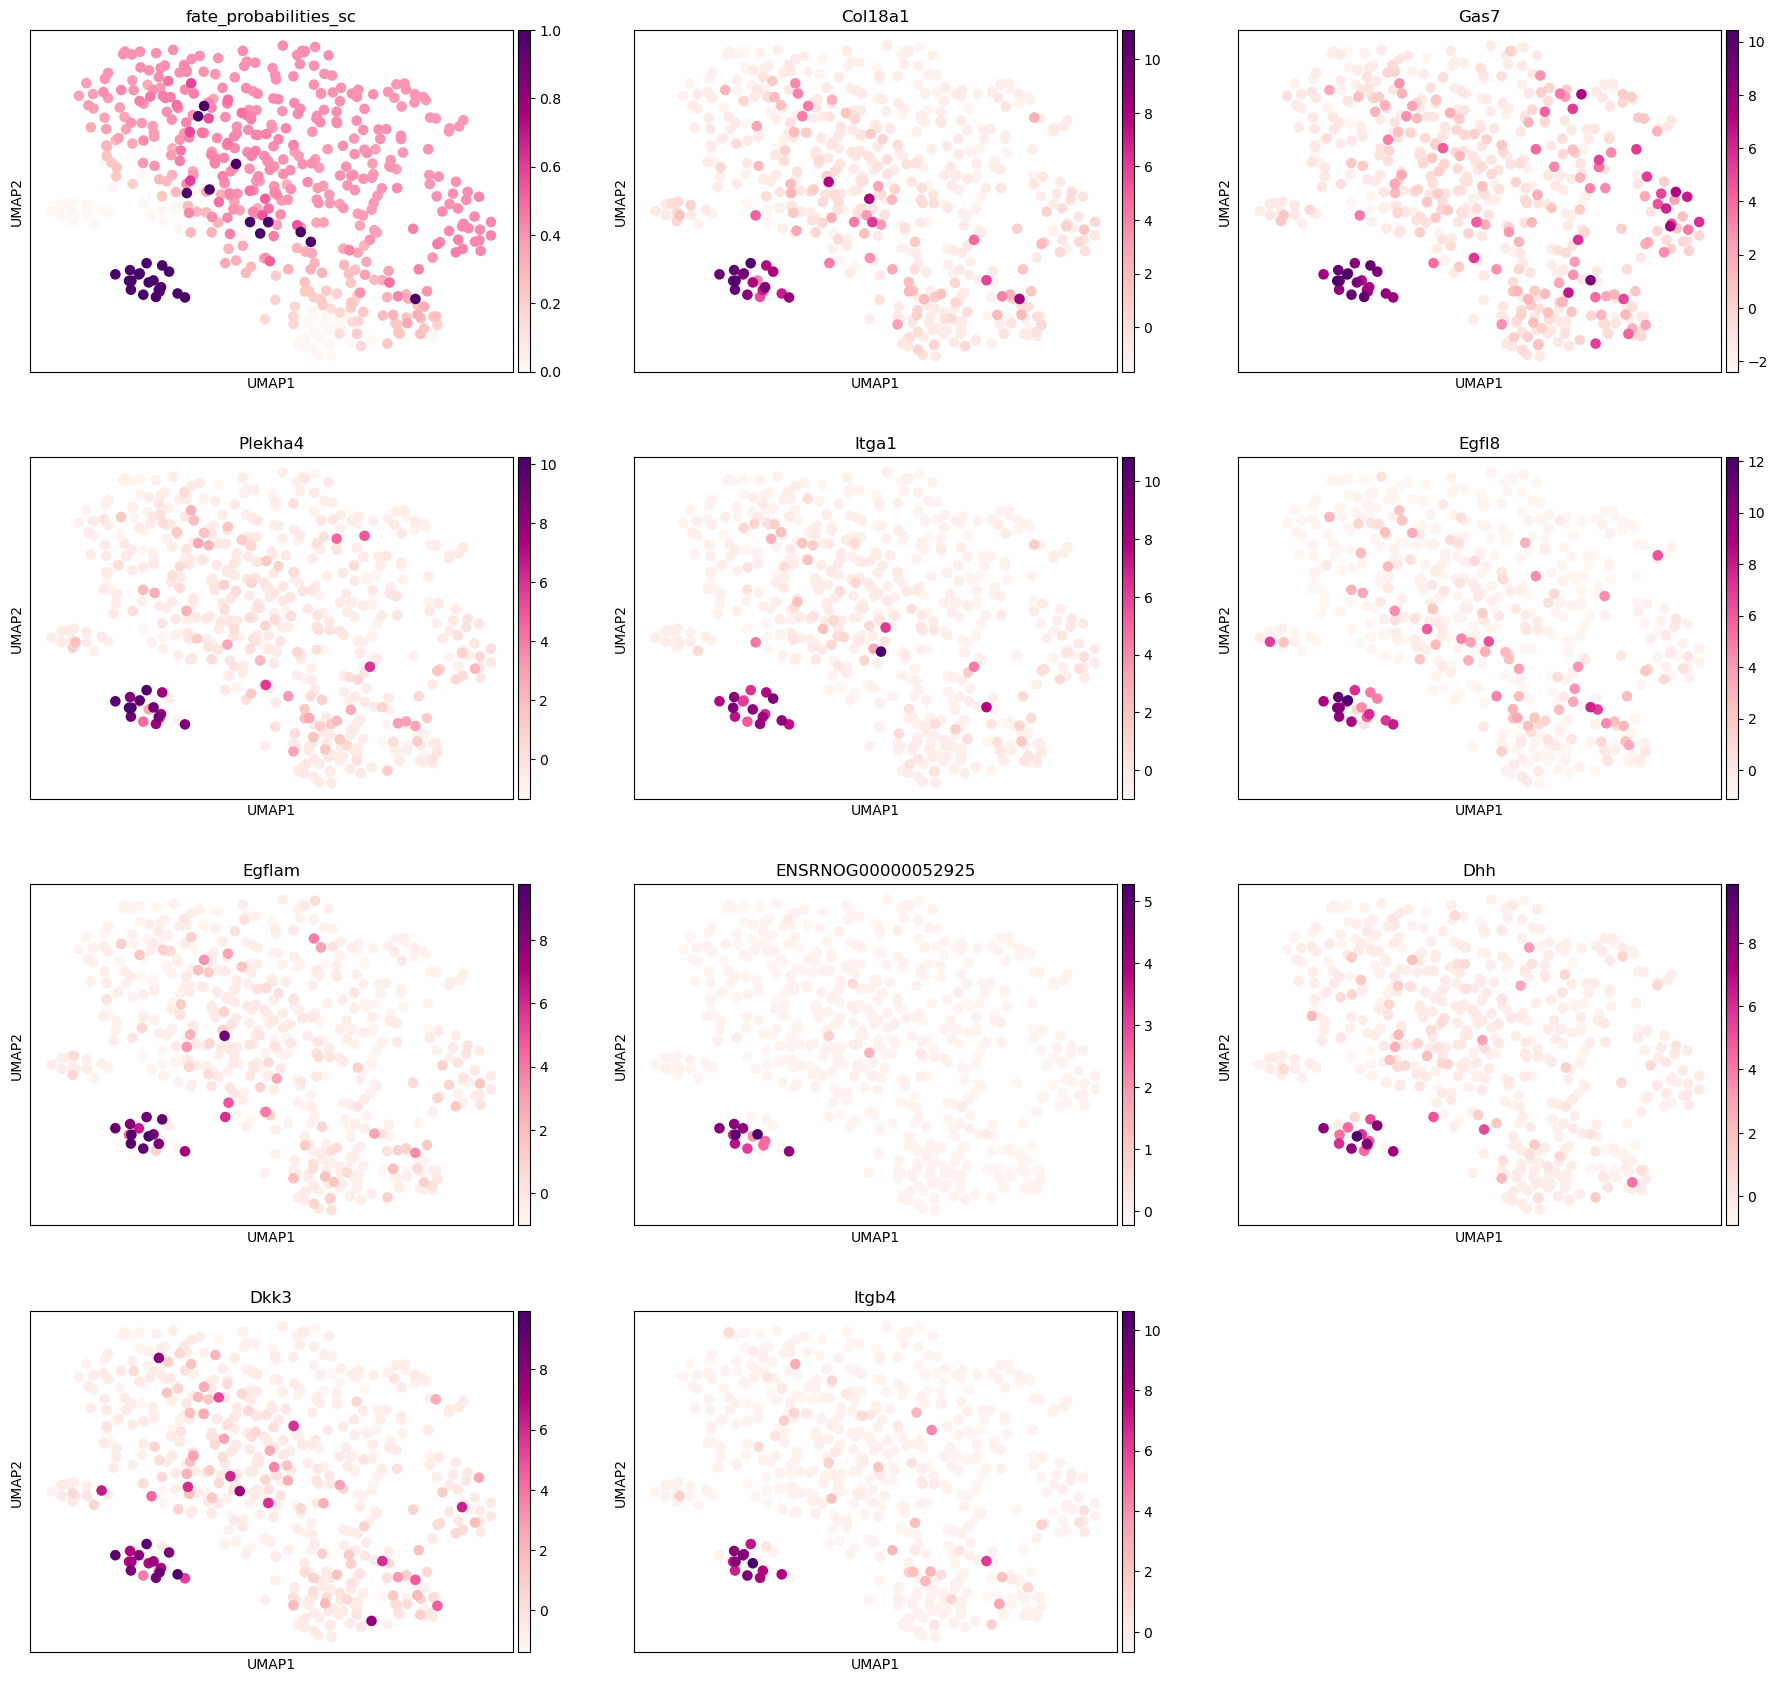

In [41]:
sc.pl.embedding(
    adata,
    basis="umap",
    color=["fate_probabilities_sc"] + list(sc_drivers.index[:10]),
    color_map="RdPu",
    # s=50,
    ncols=3,
)

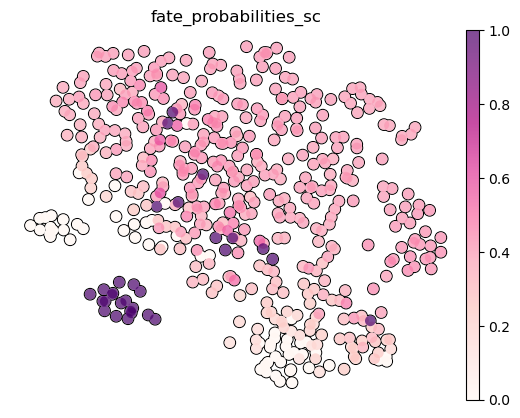

In [64]:
sc.pl.umap(
    adata,
    color=["fate_probabilities_sc"],
    color_map="RdPu",
    frameon=False,
    add_outline = True,
    outline_width = (0.1, 0.001),
    save="_cellrank_fate_probabilities_sc.pdf"
)

In [66]:
adata.var['gene_name_backup'] = adata.var['gene_name']

In [67]:
adata.var.drop('gene_name', axis=1, inplace=True)

In [68]:
adata.write("dt_out/1_invivo_analysis/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_PAGA_cellrank.h5ad")

Check Sox10 and Olig2

In [2]:
adata = sc.read_h5ad("dt_out/1_invivo_analysis/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_PAGA_cellrank.h5ad")

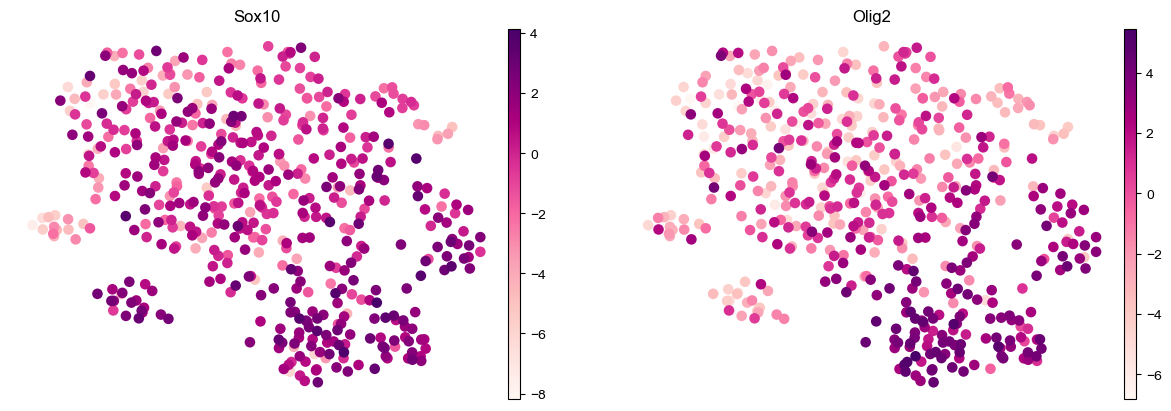

In [12]:
sc.pl.embedding(
    adata,
    basis="umap",
    color=["Sox10","Olig2"] ,
    color_map="RdPu",
    frameon=False,
    # s=50,
    ncols=2,
    save = "_invivo_Sox10_Olig2_expression_by_cluster.pdf"
)

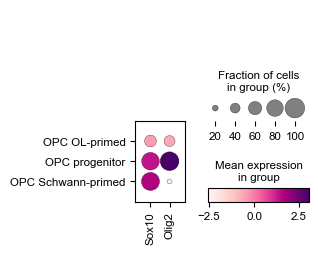

In [11]:
sc.pl.dotplot(
    adata,
    var_names=["Sox10","Olig2"] ,
    groupby="celltype",
    color_map="RdPu",
    save = "invivo_Sox10_Olig2_expression_by_cluster.pdf"
)

In [3]:
adata.obs.to_csv("dt_out/1_invivo_analysis/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_PAGA_cellrank_obs.csv")

In [6]:
adata.obs

,condition,sample,Sample_id,Plate,Animal,Batch,Condition,Well,n_genes_by_counts,total_counts,...,leiden_0.3,leiden_0.4,celltype,dpt_pseudotime,SC_genes,macrostates_fwd,term_states_fwd,term_states_fwd_probs,clusters_gradients,fate_probabilities_sc
SLX-11523.i701_i502,SLX-11523,SLX-11523,SLX.11523.i701_i502,6,E,3,Lesion,B1,7702,1139958.0,...,1,2,OPC OL-primed,0.566374,2.164656,OPC OL-primed_7,NaN,0.114764,OPC Schwann-primed,0.443334
SLX-11523.i701_i503,SLX-11523,SLX-11523,SLX.11523.i701_i503,6,E,3,Lesion,C1,8732,667251.0,...,2,3,OPC Schwann-primed,0.729593,2.545330,OPC Schwann-primed,OPC Schwann-primed,0.855124,OPC Schwann-primed,1.000000
SLX-11523.i701_i504,SLX-11523,SLX-11523,SLX.11523.i701_i504,6,E,3,Lesion,D1,8132,2781575.0,...,1,1,OPC progenitor,0.000000,1.541138,OPC progenitor,OPC progenitor,0.951983,OPC progenitor,0.000000
SLX-11523.i701_i505,SLX-11523,SLX-11523,SLX.11523.i701_i505,6,E,3,Lesion,E1,7982,6536498.0,...,1,2,OPC OL-primed,0.626892,-0.003855,OPC OL-primed_7,NaN,0.017989,OPC OL-primed_6,0.416677
SLX-11523.i701_i506,SLX-11523,SLX-11523,SLX.11523.i701_i506,6,E,3,Lesion,F1,8596,3065727.0,...,1,2,OPC OL-primed,0.650798,-0.530813,OPC OL-primed_7,NaN,0.051508,OPC Schwann-primed,0.426964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLX-11520.i712_i505,SLX-11520,SLX-11520,SLX.11520.i712_i505,3,D,2,Naive,E12,7019,4859252.0,...,0,0,OPC OL-primed,0.572791,-0.253847,NaN,NaN,0.087453,OPC OL-primed_6,0.371205
SLX-11520.i712_i506,SLX-11520,SLX-11520,SLX.11520.i712_i506,3,D,2,Naive,F12,6784,1928850.0,...,1,1,OPC progenitor,0.185238,1.067460,NaN,NaN,0.539317,OPC OL-primed_6,0.259370
SLX-11520.i712_i507,SLX-11520,SLX-11520,SLX.11520.i712_i507,3,D,2,Naive,G12,5463,1704253.0,...,0,4,OPC OL-primed,0.917635,-0.617727,OPC OL-primed_6,OPC OL-primed_6,0.987300,OPC OL-primed_6,0.000000
SLX-11520.i712_i508,SLX-11520,SLX-11520,SLX.11520.i712_i508,3,D,2,Naive,H12,5914,1768183.0,...,0,0,OPC OL-primed,0.712223,-0.204220,NaN,NaN,0.046413,OPC OL-primed_6,0.401429


In [4]:
%load_ext rpy2.ipython
# Load required libraries


In [15]:
%%R
library(ggplot2)

df = read.csv("dt_out/1_invivo_analysis/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_PAGA_cellrank_obs.csv")
df$celltype <- as.factor(df$celltype)
ggplot(df, aes(x = SC_genes, y = fate_probabilities_sc, color = celltype)) +
  geom_point(alpha = 0.7,stroke=NA) +
  geom_smooth(method = "lm", color = "black", size = 1) + 
  # scale_fill_distiller(palette = "RdPu",direction = 1) + 
  # scale_color_distiller(palette = "RdPu",direction = 1) + 
    # scale_colour_brewer(palette = "tab20b") + 
  labs( x = "SC genes", y = "pseudotime") +
  theme_classic()
ggsave("figures/scatterplot_invivo_pseudotime_SCgenes_correlation.pdf",width = 5.5, height = 3)

`geom_smooth()` using formula = 'y ~ x'
